In [3]:
import json
from tabulate import tabulate

def display_metrics_table(json_file_path):
    """
    Loads a JSON file containing model evaluation metrics and displays
    accuracy, precision, recall, and F1-score in a table.

    Args:
        json_file_path (str): The path to the JSON file.
    """
    try:
        with open(json_file_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Error: File not found at {json_file_path}")
        return
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {json_file_path}")
        return

    table_data = []
    headers = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

    for model_name, metrics in data.items():
        if all(key in metrics for key in ["accuracy", "precision_macro", "recall_macro", "f1_macro"]):
            table_data.append([
                model_name,
                f"{metrics['accuracy']:.2f}",
                f"{metrics['precision_macro']:.2f}",
                f"{metrics['recall_macro']:.2f}",
                f"{metrics['f1_macro']:.2f}"
            ])

    print(tabulate(table_data, headers=headers, tablefmt="grid"))
    
if __name__ == "__main__":
    file_path = 'evaluation_results.json'  
    display_metrics_table(file_path)

+---------------+------------+-------------+----------+------------+
| Model         |   Accuracy |   Precision |   Recall |   F1-Score |
+===============+============+=============+==========+============+
| cnn           |      43.59 |       41.1  |    43.51 |      39.78 |
+---------------+------------+-------------+----------+------------+
| svm           |      44.53 |       43.52 |    44.32 |      43.56 |
+---------------+------------+-------------+----------+------------+
| random_forest |      48.56 |       47.58 |    48.7  |      46.71 |
+---------------+------------+-------------+----------+------------+
| roberta       |      95.08 |       95.2  |    95.04 |      95.08 |
+---------------+------------+-------------+----------+------------+
| wav2vec2      |      78.11 |       78.05 |    78.7  |      78.02 |
+---------------+------------+-------------+----------+------------+


# **Grouped Bar Chart – Main Performance Comparison**

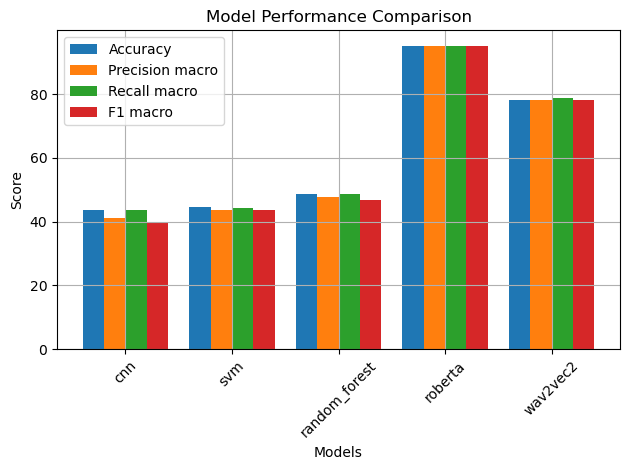

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_grouped_bar_chart(json_file_path):
    with open(json_file_path, 'r') as f:
        data = json.load(f)

    metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    models = list(data.keys())
    values = [[data[model][metric] for model in models] for metric in metrics]

    x = np.arange(len(models))
    width = 0.2

    fig, ax = plt.subplots()
    for i, (metric, metric_values) in enumerate(zip(metrics, values)):
        ax.bar(x + i * width, metric_values, width, label=metric.capitalize().replace("_", " "))

    ax.set_xlabel('Models')
    ax.set_ylabel('Score')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(models)
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_grouped_bar_chart('evaluation_results.json')


# **Confusion Matrix Plot – For Best-Performing Model (e.g., Wav2Vec2.0)**

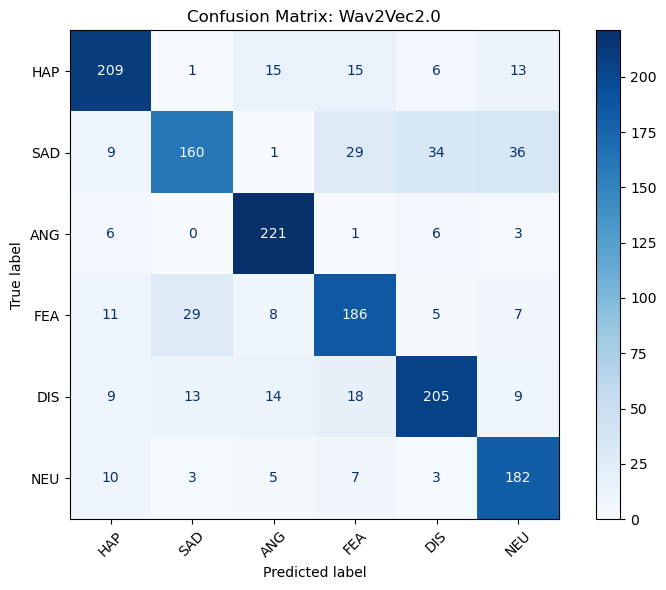

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Replace this with your real confusion matrix and label list
confusion_matrix = np.array([
    [209, 1, 15, 15, 6, 13],
    [9, 160, 1, 29, 34, 36],
    [6, 0, 221, 1, 6, 3],
    [11, 29, 8, 186, 5, 7],
    [9, 13, 14, 18, 205, 9],
    [10, 3, 5, 7, 3, 182]
])

emotion_labels = ['HAP', 'SAD', 'ANG', 'FEA', 'DIS', 'NEU']

def plot_confusion_matrix(cm, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title("Confusion Matrix: Wav2Vec2.0")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(confusion_matrix, emotion_labels)


# **Radar Chart – Visual Summary of Model Strengths**

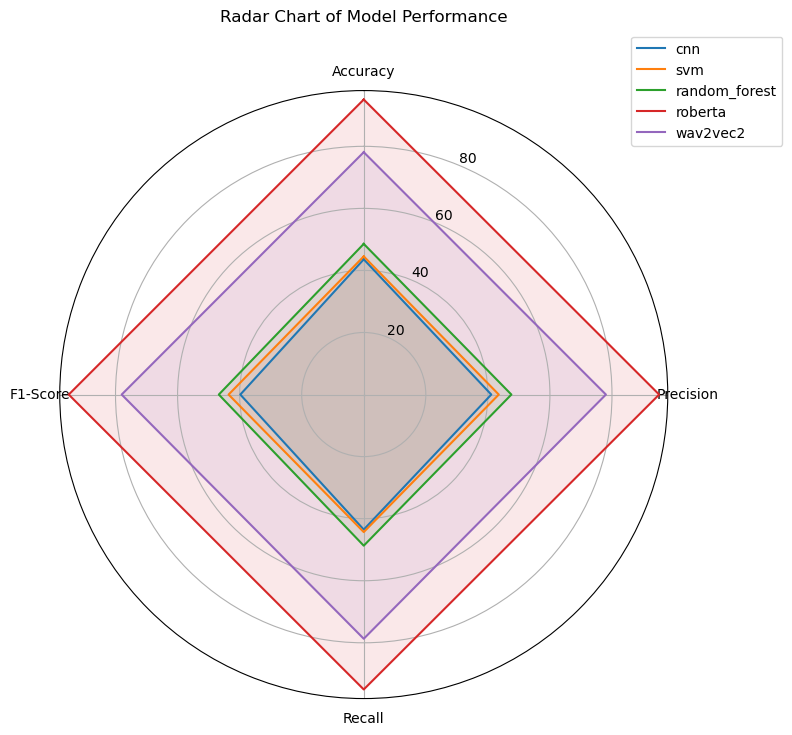

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import json

def plot_radar_chart(json_file_path):
    with open(json_file_path, 'r') as f:
        data = json.load(f)

    labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for model_name, metrics in data.items():
        scores = [
            metrics['accuracy'],
            metrics['precision_macro'],
            metrics['recall_macro'],
            metrics['f1_macro']
        ]
        scores += scores[:1]
        ax.plot(angles, scores, label=model_name)
        ax.fill(angles, scores, alpha=0.1)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title("Radar Chart of Model Performance", y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.show()

plot_radar_chart('evaluation_results.json')

# **Line Chart for Model Performance**

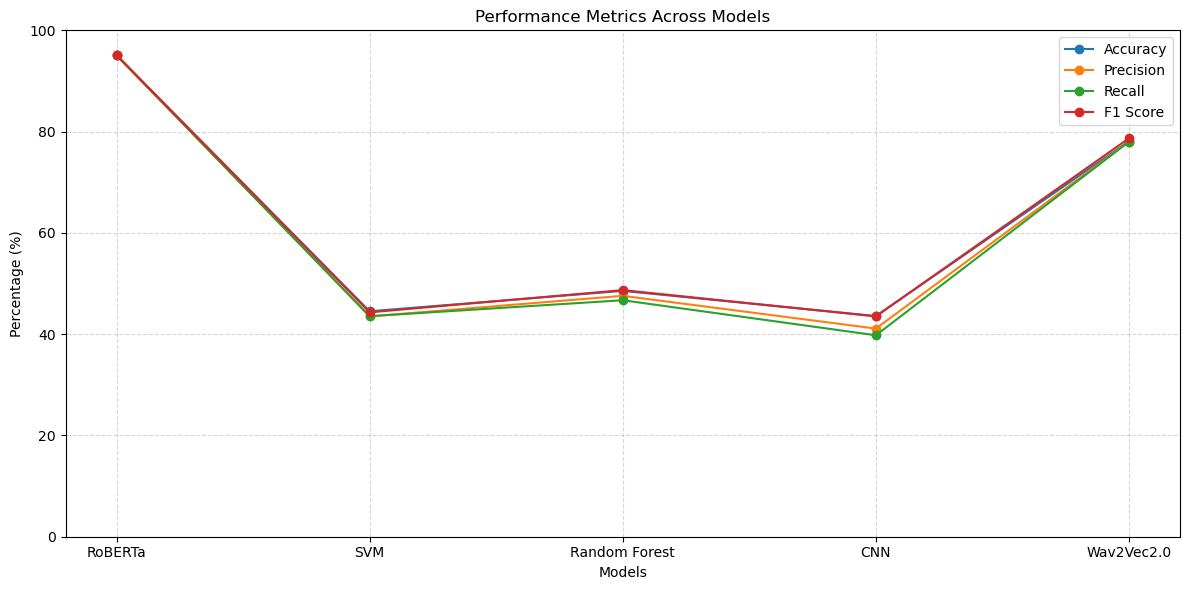

In [8]:
import matplotlib.pyplot as plt

# Model names
models = ['RoBERTa', 'SVM', 'Random Forest', 'CNN', 'Wav2Vec2.0']

# Performance metrics for each model
accuracy = [95.08, 44.52, 48.55, 43.58, 78.10]
precision = [95.20, 43.51, 47.57, 41.10, 78.04]
recall = [95.04, 43.55, 46.70, 39.78, 78.01]
f1_score = [95.08, 44.31, 48.70, 43.51, 78.69]

# Plotting the lines
plt.figure(figsize=(12, 6))
plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, f1_score, marker='o', label='F1 Score')

# Adding chart elements
plt.title('Performance Metrics Across Models')
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
